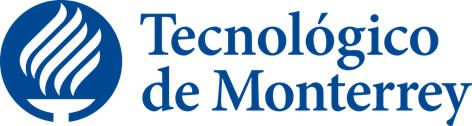

In [39]:
from IPython.display import Image
Image(filename="./images/tec-logo.jpg", width=500)

<hr>

# Power production in a Combined Cycle Power Plant

## Note:

Database can be downloaded from [here](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)

The database was originally deployed in this [reference](https://www.sciencedirect.com/science/article/pii/S0142061514000908?via%3Dihub)

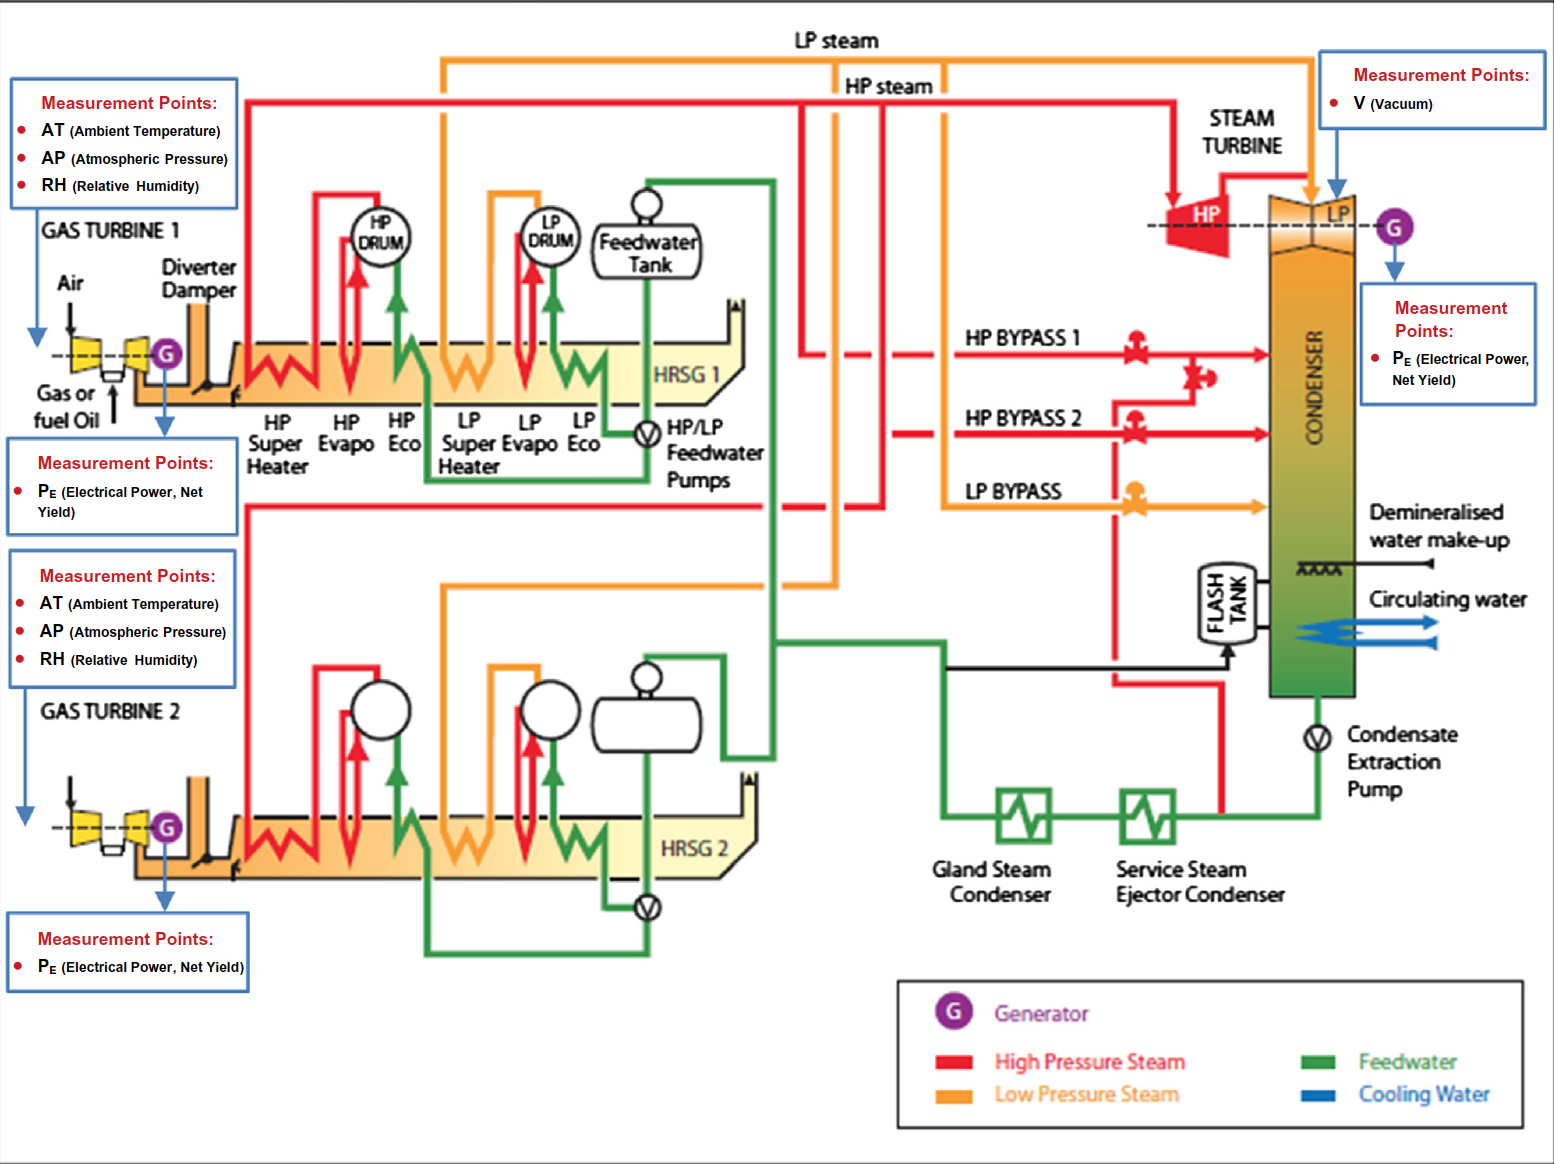

In [19]:
Image(filename="./images/fig-ccpp.png", width=900)

In [20]:
import os
data_file6 = open(os.path.join('data_2006.csv'))
data6 = data_file6.read()

data_file7 = open(os.path.join('data_2007.csv'))
data7 = data_file7.read()

data_file8 = open(os.path.join('data_2008.csv'))
data8 = data_file8.read()

data_file9 = open(os.path.join('data_2009.csv'))
data9 = data_file9.read()

data_file10 = open(os.path.join('data_2010.csv'))
data10 = data_file10.read()


lines6 = data6.split('\n')
header6 = lines6[0].split(',')
lines6 = lines6[1:]

lines7 = data7.split('\n')
header7 = lines7[0].split(',')
lines7 = lines7[1:]

lines8 = data8.split('\n')
header8 = lines8[0].split(',')
lines8 = lines8[1:]

lines9 = data9.split('\n')
header9 = lines9[0].split(',')
lines9 = lines9[1:]

lines10 = data10.split('\n')
header10 = lines10[0].split(',')
lines10 = lines10[1:]


In [21]:
import numpy as np
float_data6  = np.zeros((len(lines6)  , len(header6)))
float_data7  = np.zeros((len(lines7)  , len(header7)))
float_data8  = np.zeros((len(lines8)  , len(header8)))
float_data9  = np.zeros((len(lines9)  , len(header9)))
float_data10 = np.zeros((len(lines10) , len(header10)))

for i, line in enumerate(lines6):
    values6 = [float(x) for x in line.split(',')[0:]]
    float_data6[i,:] = values6
    
for i, line in enumerate(lines7):
    values7 = [float(x) for x in line.split(',')[0:]]
    float_data7[i,:] = values7

for i, line in enumerate(lines8):
    values8 = [float(x) for x in line.split(',')[0:]]
    float_data8[i,:] = values8

for i, line in enumerate(lines9):
    values9 = [float(x) for x in line.split(',')[0:]]
    float_data9[i,:] = values9

for i, line in enumerate(lines10):
    values10 = [float(x) for x in line.split(',')[0:]]
    float_data10[i,:] = values10
        
float_data = np.concatenate((float_data6, float_data7, float_data8, float_data9, float_data10))        

In [22]:
from matplotlib import pyplot as plt
temperature = float_data[:,0]
vaccum      = float_data[:,1]
pressure    = float_data[:,2]
humidity    = float_data[:,3]
power       = float_data[:,4]

### Data scaling: simple scaling dividing each  feature (column) by the maximum value of each feature, so all numerical values are within the range [0,1]

In [23]:
max_value = float_data.max(axis=0) 
float_data  /= max_value


#mean = float_data.mean(axis=0)
#float_data -= mean
#std = float_data.std(axis=0)
#float_data /= std

### Split raw data into 3 sets: (a) Training (60%), (b) Validation (20%) and Testing data(20%)

In [24]:
data_training   = float_data[:28704]
data_validation = float_data[28705:38272]
data_testing    = float_data[38273:]

x_training      = data_training[:,0:4]
y_training      = data_training[:,4]

x_validation    = data_validation[:,0:4]
y_validation    = data_validation[:,4]

x_testing       = data_testing[:,0:4]
y_testing       = data_testing[:,4]

### Now let's try to fit a DL model for power forecasting

In [25]:
from  keras.models import Sequential
from keras.layers  import Dense, Activation

model_ccpp = Sequential()
model_ccpp.add(Dense(64, input_dim=4, activation="relu"))
model_ccpp.add(Dense(32, activation="relu"))
model_ccpp.add(Dense(16, activation="relu"))
model_ccpp.add(Dense(8, activation="relu"))
model_ccpp.add(Dense(1,  activation="relu"))
model_ccpp.compile(optimizer="Adam", loss="mean_squared_error", metrics=["mean_squared_error"])

In [26]:
#model_ccpp.fit(x_training, y_training, batch_size=64, epochs=10, validation_data=(x_validation,y_validation))

history = model_ccpp.fit(x_training, y_training,  epochs=10, validation_data=(x_validation,y_validation))

Train on 28704 samples, validate on 9567 samples
Epoch 1/10
28704/28704 [==============================] - 1s 34us/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 1.0330e-04 - val_mean_squared_error: 1.0330e-04
Epoch 2/10
28704/28704 [==============================] - 1s 26us/step - loss: 8.5391e-05 - mean_squared_error: 8.5391e-05 - val_loss: 7.9181e-05 - val_mean_squared_error: 7.9181e-05
Epoch 3/10
28704/28704 [==============================] - 1s 25us/step - loss: 8.7347e-05 - mean_squared_error: 8.7347e-05 - val_loss: 9.5338e-05 - val_mean_squared_error: 9.5338e-05
Epoch 4/10
28704/28704 [==============================] - 1s 26us/step - loss: 8.9986e-05 - mean_squared_error: 8.9986e-05 - val_loss: 7.8317e-05 - val_mean_squared_error: 7.8317e-05
Epoch 5/10
28704/28704 [==============================] - 1s 25us/step - loss: 8.9082e-05 - mean_squared_error: 8.9082e-05 - val_loss: 1.2139e-04 - val_mean_squared_error: 1.2139e-04
Epoch 6/10
28704/28704 [====================

In [27]:
print(model_ccpp.evaluate(x_testing,y_testing))

9567/9567 [==============================] - 0s 11us/step
[0.00012235662591466166, 0.00012235662591466166]


In [28]:
power_prediction = model_ccpp.predict(x_testing)

In [29]:
diff = (power_prediction.T - y_testing)*495.76
error = 100*diff.T/(power_prediction*495.76) 

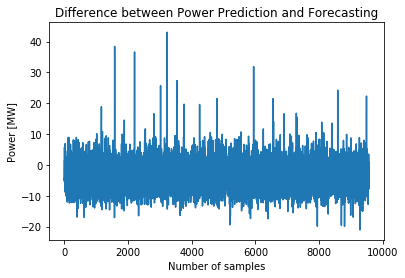

In [30]:
plt.plot(diff.T)
plt.title('Difference between Power Prediction and Forecasting')
plt.xlabel('Number of samples')
plt.ylabel('Power [MW]')
plt.show()

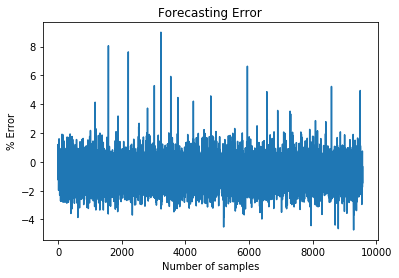

In [31]:
plt.plot(error)
plt.title('Forecasting Error')
plt.xlabel('Number of samples')
plt.ylabel('% Error')
plt.show()

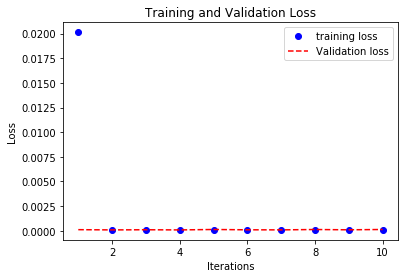

In [32]:
history_dict = history.history
history_dict.keys()

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
iters = range(1,10+1)

plt.plot(iters, loss_values,'bo', label = 'training loss')
plt.plot(iters, val_loss_values, 'r--', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

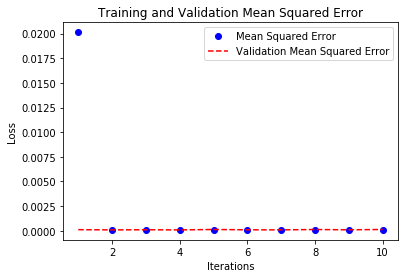

In [33]:
plt.clf()
mse_values = history_dict['mean_squared_error']
val_mse_values = history_dict['val_mean_squared_error']

plt.plot(iters, mse_values,'bo', label = 'Mean Squared Error')
plt.plot(iters, val_mse_values, 'r--', label = 'Validation Mean Squared Error')
plt.title('Training and Validation Mean Squared Error')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
